# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [81]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


In [84]:
# Look at example city
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
units = "metric"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 12.07,
  'feels_like': 11.45,
  'temp_min': 10.9,
  'temp_max': 13.21,
  'pressure': 999,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 7.72, 'deg': 240, 'gust': 12.86},
 'clouds': {'all': 75},
 'dt': 1699909527,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1699859666,
  'sunset': 1699892111},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [85]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        get_city_weather = requests.get(city_url)
        city_weather = get_city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iskateley
Processing Record 2 of Set 1 | port saint john's
Processing Record 3 of Set 1 | ta`u
Processing Record 4 of Set 1 | timbuktu
Processing Record 5 of Set 1 | alexandria
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | arevalo
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | bac lieu
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | susuman
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | crane
Processing Record 21 of Set 1 | palikir - national government center
Process

Processing Record 36 of Set 4 | fale old settlement
Processing Record 37 of Set 4 | khark
Processing Record 38 of Set 4 | tome acu
Processing Record 39 of Set 4 | jarabulus
Processing Record 40 of Set 4 | demmin
Processing Record 41 of Set 4 | nieuw amsterdam
Processing Record 42 of Set 4 | prado
Processing Record 43 of Set 4 | emerald
Processing Record 44 of Set 4 | essaouira
Processing Record 45 of Set 4 | severo-yeniseyskiy
Processing Record 46 of Set 4 | sinop
Processing Record 47 of Set 4 | les avirons
Processing Record 48 of Set 4 | nuuk
Processing Record 49 of Set 4 | hithadhoo
Processing Record 0 of Set 5 | tomatlan
Processing Record 1 of Set 5 | tambura
Processing Record 2 of Set 5 | kasserine
Processing Record 3 of Set 5 | kapa'a
Processing Record 4 of Set 5 | al kharijah
Processing Record 5 of Set 5 | el alto
Processing Record 6 of Set 5 | selfoss
Processing Record 7 of Set 5 | isla aguada
Processing Record 8 of Set 5 | luderitz
Processing Record 9 of Set 5 | sungai raya
Pro

Processing Record 30 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 31 of Set 8 | tchintabaraden
Processing Record 32 of Set 8 | san mateo del mar
Processing Record 33 of Set 8 | dalai
Processing Record 34 of Set 8 | san antonio de pale
Processing Record 35 of Set 8 | mhamid
Processing Record 36 of Set 8 | sretensk
Processing Record 37 of Set 8 | vilyuchinsk
Processing Record 38 of Set 8 | 'ibri
City not found. Skipping...
Processing Record 39 of Set 8 | kimbe
Processing Record 40 of Set 8 | kismayo
Processing Record 41 of Set 8 | talalayivka
Processing Record 42 of Set 8 | vorgashor
Processing Record 43 of Set 8 | svencioneliai
Processing Record 44 of Set 8 | zakamensk
Processing Record 45 of Set 8 | ceres
Processing Record 46 of Set 8 | kristiansund
Processing Record 47 of Set 8 | punta del este
Processing Record 48 of Set 8 | la arena
Processing Record 49 of Set 8 | borovichi
Processing Record 0 of Set 9 | san isidro
Processing Record 1 of Set 9 | papao
Processin

Processing Record 18 of Set 12 | dunedin
Processing Record 19 of Set 12 | pointe aux piments
Processing Record 20 of Set 12 | chui
Processing Record 21 of Set 12 | antsiranana
Processing Record 22 of Set 12 | masterton
Processing Record 23 of Set 12 | zakynthos
Processing Record 24 of Set 12 | ebon
Processing Record 25 of Set 12 | hoemul-li
Processing Record 26 of Set 12 | kayangel
Processing Record 27 of Set 12 | altay
Processing Record 28 of Set 12 | soligalich
Processing Record 29 of Set 12 | sambava
Processing Record 30 of Set 12 | badger
Processing Record 31 of Set 12 | zhovkva
Processing Record 32 of Set 12 | boryspil'
City not found. Skipping...
Processing Record 33 of Set 12 | nacala
Processing Record 34 of Set 12 | itoman
Processing Record 35 of Set 12 | karymskoye
Processing Record 36 of Set 12 | trincomalee
Processing Record 37 of Set 12 | jianshui
Processing Record 38 of Set 12 | el porvenir
Processing Record 39 of Set 12 | minas de marcona
Processing Record 40 of Set 12 | 

In [86]:
# Check list
# print(city_data)

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [87]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iskateley,67.6803,53.1512,-13.32,97,100,3.58,RU,1699909976
1,port saint john's,-31.6229,29.5448,17.08,81,100,4.12,ZA,1699909976
2,ta`u,-14.2336,-169.5144,27.82,83,89,3.88,AS,1699909976
3,timbuktu,16.7735,-3.0074,28.86,9,0,4.70,ML,1699909976
4,alexandria,31.2156,29.9553,22.45,64,0,2.96,EG,1699909701


In [88]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [89]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,-13.32,97,100,3.58,RU,1699909976
1,port saint john's,-31.6229,29.5448,17.08,81,100,4.12,ZA,1699909976
2,ta`u,-14.2336,-169.5144,27.82,83,89,3.88,AS,1699909976
3,timbuktu,16.7735,-3.0074,28.86,9,0,4.70,ML,1699909976
4,alexandria,31.2156,29.9553,22.45,64,0,2.96,EG,1699909701


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

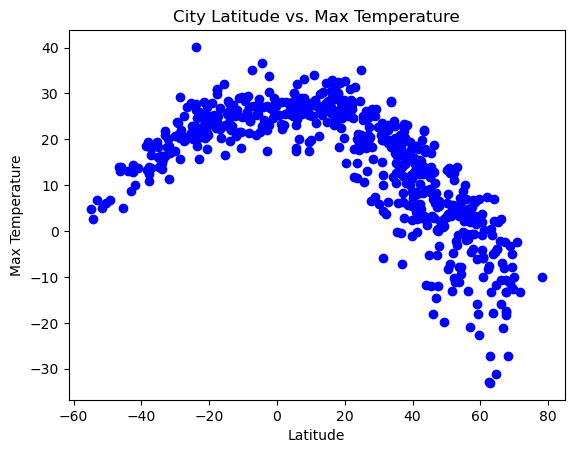

<Figure size 640x480 with 0 Axes>

In [90]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Max Temperature')
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

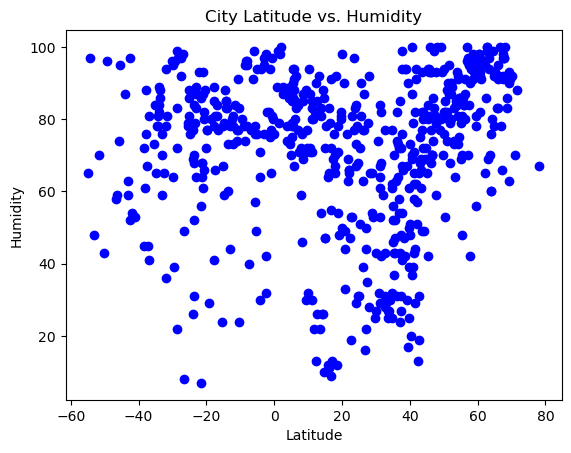

<Figure size 640x480 with 0 Axes>

In [91]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

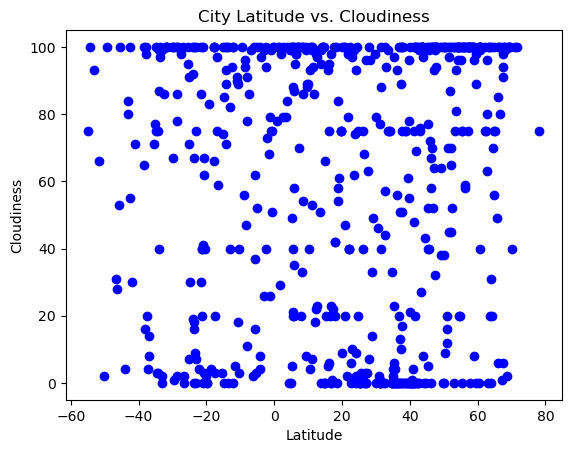

<Figure size 640x480 with 0 Axes>

In [92]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.show()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

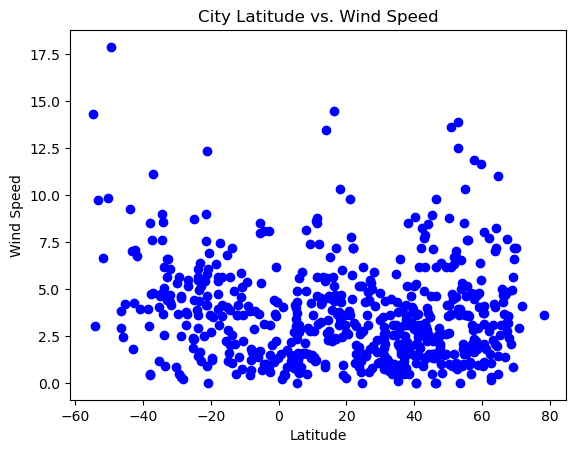

<Figure size 640x480 with 0 Axes>

In [93]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.show()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [94]:
# Define a function to create Linear Regression plots


In [95]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,-13.32,97,100,3.58,RU,1699909976
3,timbuktu,16.7735,-3.0074,28.86,9,0,4.70,ML,1699909976
4,alexandria,31.2156,29.9553,22.45,64,0,2.96,EG,1699909701
5,bethel,41.3712,-73.4140,8.05,58,75,3.09,US,1699909976
6,arevalo,41.0626,-4.7204,13.50,79,4,2.43,ES,1699909976


In [96]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port saint john's,-31.6229,29.5448,17.08,81,100,4.12,ZA,1699909976
2,ta`u,-14.2336,-169.5144,27.82,83,89,3.88,AS,1699909976
8,invercargill,-46.4000,168.3500,13.01,59,28,3.83,NZ,1699909977
11,grytviken,-54.2811,-36.5092,2.64,97,100,3.03,GS,1699909977
13,margaret river,-33.9500,115.0667,14.84,89,99,5.06,AU,1699909977


###  Temperature vs. Latitude Linear Regression Plot

The line equation is: y = -0.63x + 34.9
The r-value is: -0.8464775494470268


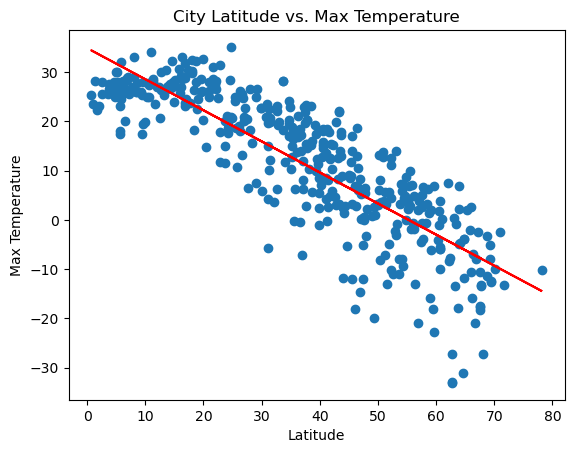

In [97]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Calculate the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Max Temperature')

# Print r value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = 0.37x + 29.7
The r-value is: 0.781408067465837


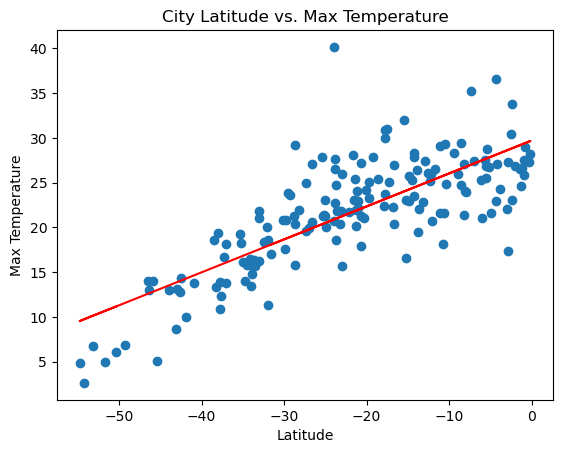

In [98]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Calculate the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Max Temperature')

# Print r value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:**

Temperatures rise as you get closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The line equation is: y = 0.3x + 59.28
The r-value is: 0.25888585771506156


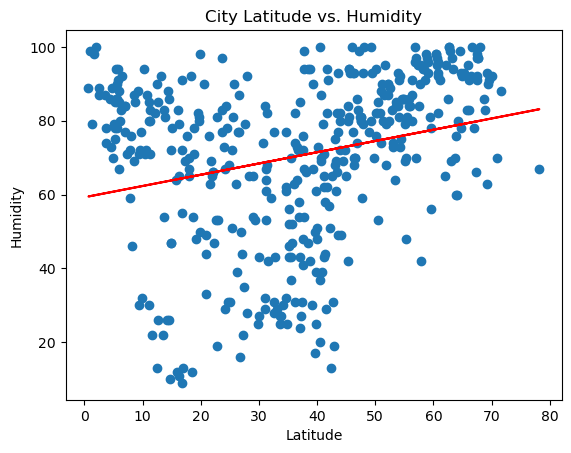

In [99]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Calculate the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')

# Print r value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = 0.15x + 76.37
The r-value is: 0.10284090464872435


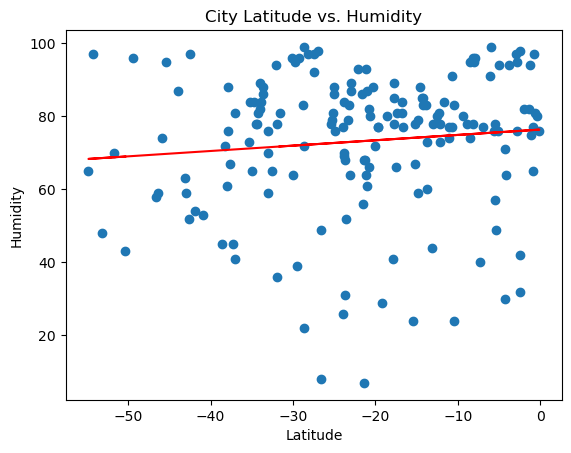

In [100]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Calculate the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')

# Print r value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:**

There is generally no difference between the northern and southern hemisphere as it relates to humidity. There is a weak relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The line equation is: y = 0.26x + 49.74
The r-value is: 0.1209882088526367


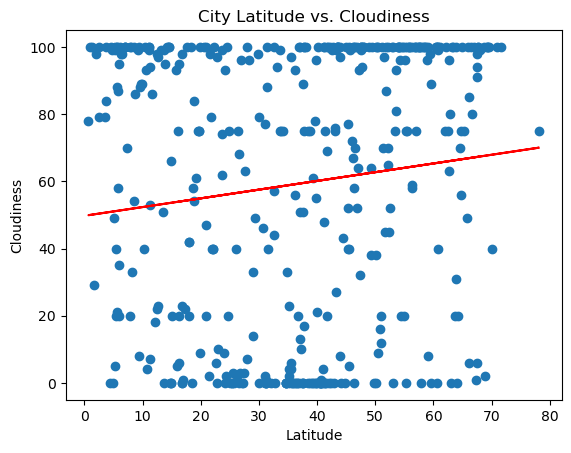

In [101]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Calculate the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

# Print r value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = 0.05x + 61.94
The r-value is: 0.018663037248083


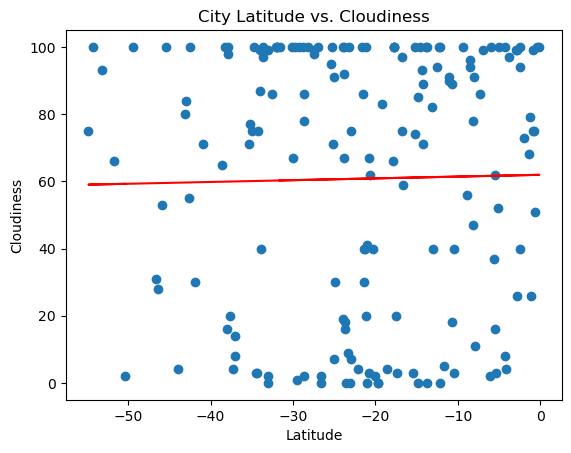

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Calculate the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

# Print r value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:**

There is generally no difference between the northern and southern hemisphere as it relates to cloudiness. There is a weak relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The line equation is: y = 0.01x + 3.01
The r-value is: 0.09451665630302197


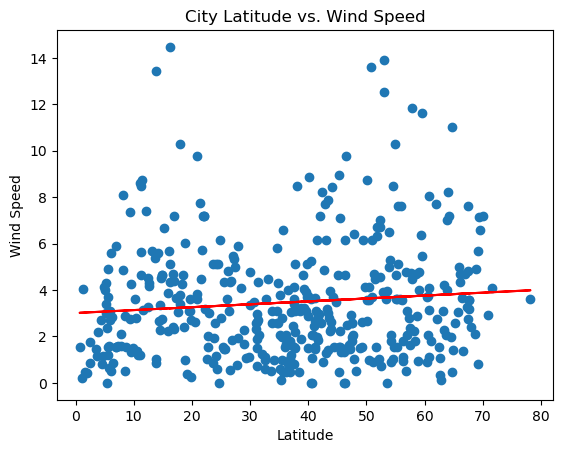

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Calculate the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')

# Print r value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = -0.07x + 2.57
The r-value is: -0.36017253446487263


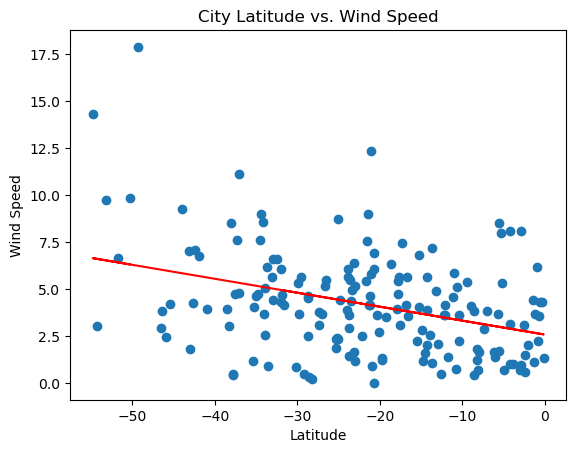

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Calculate the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')

# Print r value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:**

There is slight negative relationship between latitude and wind speed in the southern hemisphere. There is a weak relationship between the twi variables and no relationship in the northern hemisphere.